---Testing---

/home/max/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


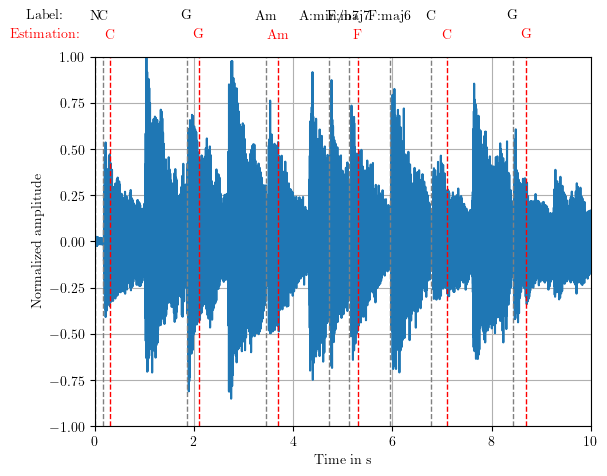

In [6]:

import dataloader
import chromagram
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from matplotlib import rc
import joblib
import train_hmm
# Enable LaTeX support in matplotlib
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

chord_labels = {'C:min':'Cm','C#:min':'C#m','D:min':'Dm','D#:min':'D#m','E:min':'Em','F:min':'Fm','F#:min':'F#m','G:min':'Gm','G#:min':'G#m',
    'A:min':'Am','A#:min':'A#m','B:min':'Bm'}

filepath = "/home/max/ET-TI/Masterarbeit/prototyping/data/beatles/audio/12_-_Let_It_Be/06_-_Let_It_Be.mp3"
annotationspath = "/home/max/ET-TI/Masterarbeit/prototyping/data/beatles/annotations/chords/beatles_12_Let_It_Be_06_Let_It_Be.chords"
modelpath = "/home/max/ET-TI/Masterarbeit/chord-recognition/hmm_model.pkl"

start_time = 0
end_time = 10

# load chromagram and predict chords in given time interval
t_chroma,chroma = chromagram.getChroma(filepath,'madmom') 
mask = (t_chroma >= start_time) & (t_chroma <= end_time)
t_chroma = t_chroma[mask]
chroma = chroma[mask,:]
model = joblib.load(modelpath)
chord_ix_predictions = model.predict(chroma)
predictions_idx,predictions = train_hmm.postprocessing(chord_ix_predictions)

# load annotations
labels_df= dataloader.getBeatlesAnnotations(annotationspath)
y,sr = librosa.load(filepath,sr=44100)
t = np.linspace(0,(len(y)-1)/sr,len(y))
mask = (t >= start_time) & (t <= end_time)
df = labels_df[(labels_df['tstart'] >= start_time) & (labels_df['tstart'] <= end_time)]

# plot waveform and annotate labels and estimated chords
fig,ax = plt.subplots()
ax.plot(t[mask],y[mask]/np.max(y[mask]))

ax.text(start_time-1,1.2,'Label:',horizontalalignment='center',color='k')
for t,label in zip(df['tstart'],df['label']):
    ax.vlines(t,-1,1,'grey',linestyles='dashed',linewidth=1)
    ax.text(t,1.2,chord_labels[label] if label in chord_labels else label,horizontalalignment='center')

ax.text(start_time-1,1.1,'Estimation:',horizontalalignment='center',color='r')
for idx,label in zip(predictions_idx,predictions):
    # ignore first ouput of hmm (aestatic reasons)
    if idx == 0:
        continue
    ax.vlines(t_chroma[idx],-1,1,'r',linestyles='dashed',linewidth=1)
    ax.text(t_chroma[idx],1.1,chord_labels[label] if label in chord_labels else label,horizontalalignment='center',color='r')

ax.set_ylim([-1,1])
ax.set_xlim(start_time,end_time)
ax.set_xlabel('Time in s')
ax.set_ylabel('Normalized amplitude')
ax.grid('on')
# Return elements chosen from x or y depending on condition.


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import circularPitchSpace as cps
import dataloader
import pandas as pd
import os
import chromagram

matplotlib.rcParams['text.usetex'] = True

basepath_labels="/home/max/ET-TI/Masterarbeit/prototyping/data/beatles/annotations/chords/"
basepath_audio = "/home/max/ET-TI/Masterarbeit/prototyping/data/beatles/audio/"

songs = dataloader.getBeatlesPaths(basepath_labels,basepath_audio)
chroma_df = dataloader.getBeatlesChroma(songs[:2])



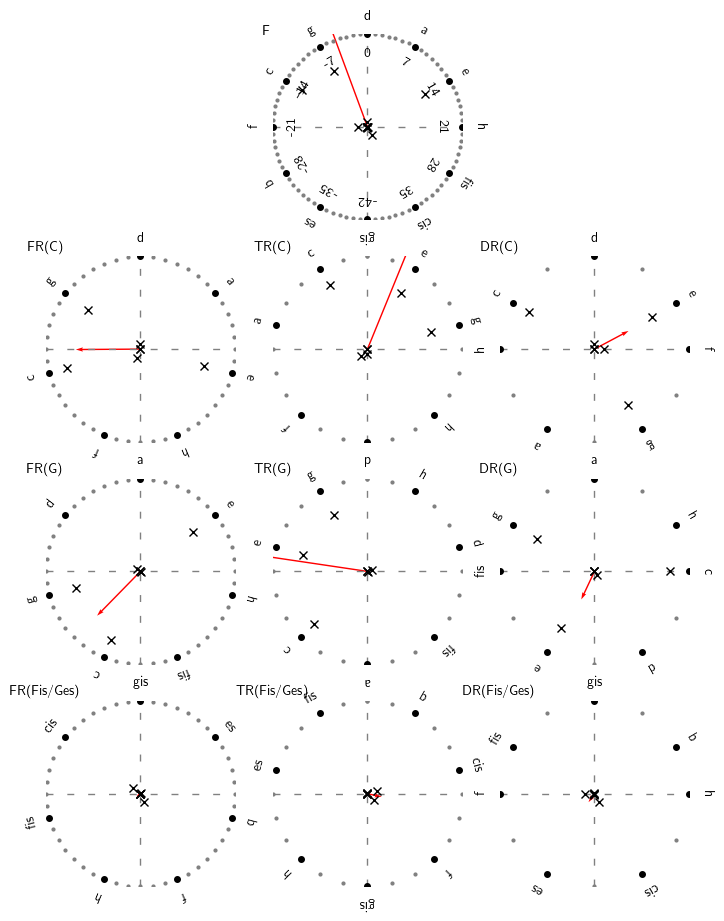

In [ ]:

chroma = np.array([[0.8,0.1,0.05,0.01,.7,.1,0.01,.7,0,0,0,0],[1,0,0,0,1,0,0,0,0,1,0,0]])
rho_F,rho_FR,rho_TR,rho_DR = cps.transformChroma(chroma)

# C,G,Fis
keys = [0,1,6]

fig,ax = plt.subplots(len(keys)+1,3,figsize=(8.3,8.3*(len(keys)+1)/3))
ax[0,0].axis('off')
cps.plotCircleOfFifths(ax[0,1],chroma=chroma[0,:])
ax[0,2].axis('off')
for i,n_k in enumerate(keys):
    cps.plotKeyRelatedRealPitches(ax[i+1,0],n_k=n_k,chroma=chroma[0,:],circle='FR')
    cps.plotKeyRelatedRealPitches(ax[i+1,1],n_k=n_k,chroma=chroma[0,:],circle='TR')
    cps.plotKeyRelatedRealPitches(ax[i+1,2],n_k=n_k,chroma=chroma[0,:],circle='DR')
# store alls 37 cps features in dataframe